# Machine Learning Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from tqdm.notebook import tqdm

## Reading DataFrame

In [2]:
df = pd.read_pickle('../data/processed_df.pkl')

## Changing / Verifying Data Types

In [3]:
df.dtypes

Protein        object
Frequency     float64
From         category
To           category
Position        int64
Row             int64
LeftAA         object
RightAA        object
dtype: object

In [4]:
df.LeftAA = df.LeftAA.astype('category')
df.RightAA = df.RightAA.astype('category')

df.dtypes

Protein        object
Frequency     float64
From         category
To           category
Position        int64
Row             int64
LeftAA       category
RightAA      category
dtype: object

## Exploring Response Variable

Text(0.5, 1.0, 'awaw')

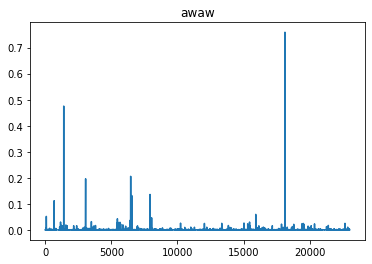

In [5]:
df.Frequency.plot()
plt.title('awaw')

In [ ]:
df[df.Frequency > 0.2]

### Normalizing frequencies by dividing by the number of occurrences

In [6]:
count_df = df.groupby(['Protein', 'Position'], as_index=False).count()

In [7]:
norm_df = df.copy()

with tqdm(total=len(count_df)) as pbar:
    for i, row in count_df.iterrows():
        norm_df.loc[(df['Protein'] == row.Protein) & (df['Position'] == row.Position), "Frequency"] = df.loc[(df['Protein'] == row.Protein) & (df['Position'] == row.Position)].Frequency / row.Frequency
        pbar.update(1)

  0%|          | 0/7521 [00:00<?, ?it/s]

In [8]:
norm_df.head()

,Protein,Frequency,From,To,Position,Row,LeftAA,RightAA
0,P0DTC1,0.000015,S,A,4393,0,Q,A
1,P0DTC1,0.000015,S,L,4393,0,Q,A
2,P0DTC1,0.000040,A,D,4394,1,S,D
3,P0DTC1,0.000040,A,S,4394,1,S,D
4,P0DTC1,0.000040,A,T,4394,1,S,D


##### Previous approach: select only first entry
clean_df = df.groupby(['Protein', 'Frequency', 'Position'], as_index=False).first()

clean_df.head()

<AxesSubplot:xlabel='Frequency'>

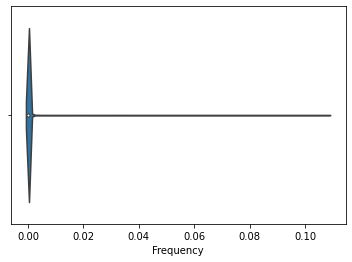

In [9]:
sns.violinplot(x=norm_df.Frequency)

<AxesSubplot:xlabel='Frequency'>

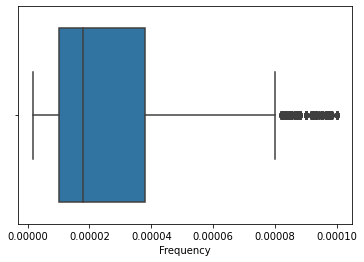

In [24]:
sns.boxplot(x=norm_df.Frequency[norm_df.Frequency<0.0001])

In [34]:
len(norm_df.Frequency[norm_df.Frequency<0.001])

22516

<AxesSubplot:xlabel='Frequency'>

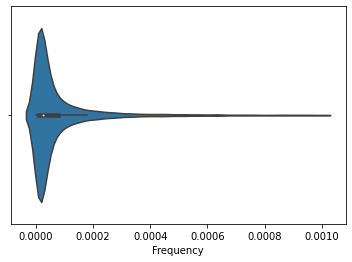

In [35]:
sns.violinplot(x=norm_df.Frequency[norm_df.Frequency<0.001])

## Merging all features

In [29]:
amino_df = pd.read_csv('../data/amino_mut.csv')
amino_df.head()

,LeftPol,RightPol,LeftVol,RightVol,LeftCharge,RightCharge,LeftHidro,RightHidro,LeftIsoEl,RightIsoEl
0,1,0,89.0,88.6,-0.539854,-0.204125,-0.8,1.8,5.240009,5.570017
1,1,0,89.0,166.7,-0.539854,-0.239898,-0.8,3.8,5.240009,5.525000
2,0,1,88.6,111.1,-0.204125,-1.235597,1.8,-3.5,5.570017,4.299381
3,0,1,88.6,89.0,-0.204125,-0.539854,1.8,-0.8,5.570017,5.240009
4,0,1,88.6,116.1,-0.204125,-0.601803,1.8,-0.7,5.570017,5.184989


In [37]:
resulting_df = pd.merge(norm_df, amino_df, left_index=True, right_index=True)

In [38]:
resulting_df.head()

,Protein,Frequency,From,To,Position,Row,LeftAA,RightAA,LeftPol,RightPol,LeftVol,RightVol,LeftCharge,RightCharge,LeftHidro,RightHidro,LeftIsoEl,RightIsoEl
0,P0DTC1,0.000015,S,A,4393,0,Q,A,1,0,89.0,88.6,-0.539854,-0.204125,-0.8,1.8,5.240009,5.570017
1,P0DTC1,0.000015,S,L,4393,0,Q,A,1,0,89.0,166.7,-0.539854,-0.239898,-0.8,3.8,5.240009,5.525000
2,P0DTC1,0.000040,A,D,4394,1,S,D,0,1,88.6,111.1,-0.204125,-1.235597,1.8,-3.5,5.570017,4.299381
3,P0DTC1,0.000040,A,S,4394,1,S,D,0,1,88.6,89.0,-0.204125,-0.539854,1.8,-0.8,5.570017,5.240009
4,P0DTC1,0.000040,A,T,4394,1,S,D,0,1,88.6,116.1,-0.204125,-0.601803,1.8,-0.7,5.570017,5.184989


In [39]:
resulting_df.to_pickle('../data/resulting_df.pkl')


- posições com mais densidade de mutação 
- score para variantes